In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [3]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df['yrs_since_refurb'] = np.where(df['yr_renovated'] == 0, (2020 - df['yr_built']), (2020 - df['yr_renovated']))

In [6]:
df = df.drop(columns=['id', 'date', 'zipcode', 'waterfront', 'yr_renovated', 'yr_built'])

In [7]:
X_df = df.drop(labels='price',axis=1)
y_df = df['price']

In [8]:
X_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,yrs_since_refurb
0,3,1.00,1180,5650,1.0,0,3,7,1180,0,47.5112,-122.257,1340,5650,65
1,3,2.25,2570,7242,2.0,0,3,7,2170,400,47.7210,-122.319,1690,7639,29
2,2,1.00,770,10000,1.0,0,3,6,770,0,47.7379,-122.233,2720,8062,87
3,4,3.00,1960,5000,1.0,0,5,7,1050,910,47.5208,-122.393,1360,5000,55
4,3,2.00,1680,8080,1.0,0,3,8,1680,0,47.6168,-122.045,1800,7503,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,3,8,1530,0,47.6993,-122.346,1530,1509,11
21609,4,2.50,2310,5813,2.0,0,3,8,2310,0,47.5107,-122.362,1830,7200,6
21610,2,0.75,1020,1350,2.0,0,3,7,1020,0,47.5944,-122.299,1020,2007,11
21611,3,2.50,1600,2388,2.0,0,3,8,1600,0,47.5345,-122.069,1410,1287,16


In [9]:
y_df

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [10]:
# Scaling all values.
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_X = pd.DataFrame(scaler.fit_transform(X_df.values), columns=X_df.columns)

X = scaled_X.values
y= y_df.values

In [11]:
# Changing y values for classification
# Min 75k 
# 25% 322 0
# 50% 450k 1
# 75% 645k 2
# Max 7.7m 3
for i in range(len(y)):
    if y[i] < 322000:
        y[i] = 0
    elif y[i] < 450000:
        y[i] = 1
    elif y[i] < 645000:
        y[i] = 2
    else:
        y[i] = 3

In [12]:
np.save("X.npy",X)
np.save("y.npy", y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Accuracy:  0.6782559932707136
Recall:  0.6771144010012424
Precision:  0.683542367758801
F1 Score :  0.679096876785559
Cohens Kappa :  0.5711468774662138


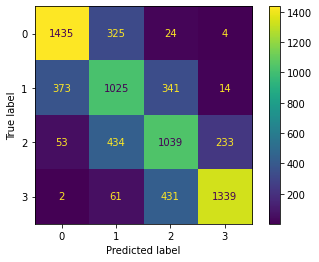

In [14]:
# confusion matrix accuracy precision recall f1 kappa
# SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, f1_score
from sklearn.svm import SVC

svc_clf = SVC(C=0.1, gamma= 1, kernel='poly')
svc_clf.fit(X_train, y_train)
y_predicted = svc_clf.predict(X_test)

cm_nodelta = confusion_matrix(y_test, y_predicted)
disp_nodelta = ConfusionMatrixDisplay(confusion_matrix=cm_nodelta)
disp_nodelta.plot()
print("Accuracy: ",accuracy_score(y_test, y_predicted))
print("Recall: ",recall_score(y_test, y_predicted, average = 'macro'))
print("Precision: ",precision_score(y_test, y_predicted, average ='macro'))
print("F1 Score : ",f1_score(y_test, y_predicted, average='macro'))
print("Cohens Kappa : ",cohen_kappa_score(y_test, y_predicted))

Accuracy:  0.6984438525164728
Recall:  0.6971573543948225
Precision:  0.7003376627553951
F1 Score :  0.6983848759914998
Cohens Kappa :  0.5979680503848669


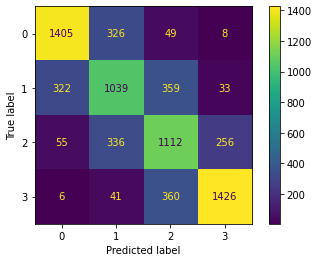

In [15]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
dtree_clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=15)
dtree_clf.fit(X_train, y_train)
y_predicted = dtree_clf.predict(X_test)

cm_nodelta = confusion_matrix(y_test, y_predicted)
disp_nodelta = ConfusionMatrixDisplay(confusion_matrix=cm_nodelta)
disp_nodelta.plot()
print("Accuracy: ",accuracy_score(y_test, y_predicted))
print("Recall: ",recall_score(y_test, y_predicted, average = 'macro'))
print("Precision: ",precision_score(y_test, y_predicted, average ='macro'))
print("F1 Score : ",f1_score(y_test, y_predicted, average='macro'))
print("Cohens Kappa : ",cohen_kappa_score(y_test, y_predicted))

Accuracy:  0.7577456890508902
Recall:  0.7568260083281868
Precision:  0.7612290533668677
F1 Score :  0.7585091605817766
Cohens Kappa :  0.6770534698723738


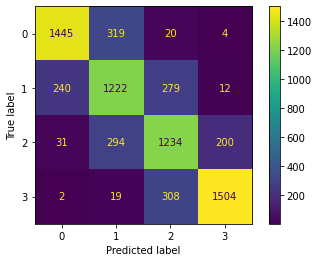

In [16]:
# confusion matrix accuracy precision recall f1 kappa
# Random Forest
from sklearn.ensemble import RandomForestClassifier

ran_forest = RandomForestClassifier(n_estimators=100, criterion='entropy')
ran_forest.fit(X_train, y_train)
y_predicted = ran_forest.predict(X_test)

cm_nodelta = confusion_matrix(y_test, y_predicted)
disp_nodelta = ConfusionMatrixDisplay(confusion_matrix=cm_nodelta)
disp_nodelta.plot()
print("Accuracy: ",accuracy_score(y_test, y_predicted))
print("Recall: ",recall_score(y_test, y_predicted, average = 'macro'))
print("Precision: ",precision_score(y_test, y_predicted, average ='macro'))
print("F1 Score : ",f1_score(y_test, y_predicted, average='macro'))
print("Cohens Kappa : ",cohen_kappa_score(y_test, y_predicted))

Accuracy:  0.7019486891910837
Recall:  0.7008418174252421
Precision:  0.7049867690328065
F1 Score :  0.7017474389281059
Cohens Kappa :  0.6026948851331058


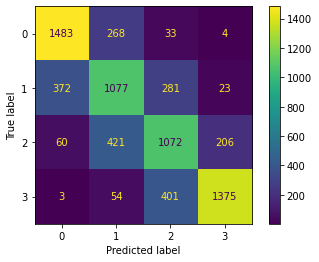

In [17]:
from sklearn.neighbors import KNeighborsClassifier
# KNN

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)

cm_nodelta = confusion_matrix(y_test, y_predicted)
disp_nodelta = ConfusionMatrixDisplay(confusion_matrix=cm_nodelta)
disp_nodelta.plot()
print("Accuracy: ",accuracy_score(y_test, y_predicted))
print("Recall: ",recall_score(y_test, y_predicted, average = 'macro'))
print("Precision: ",precision_score(y_test, y_predicted, average ='macro'))
print("F1 Score : ",f1_score(y_test, y_predicted, average='macro'))
print("Cohens Kappa : ",cohen_kappa_score(y_test, y_predicted))

Accuracy:  0.6483947848030281
Recall:  0.6467721055281914
Precision:  0.64885894338384
F1 Score :  0.647300732467241
Cohens Kappa :  0.5312308608019134


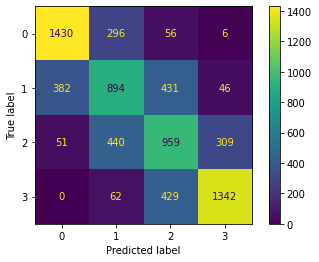

In [24]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression

bayes = LogisticRegression(C=30, max_iter=500)
bayes.fit(X_train, y_train)
y_predicted = bayes.predict(X_test)

cm_nodelta = confusion_matrix(y_test, y_predicted)
disp_nodelta = ConfusionMatrixDisplay(confusion_matrix=cm_nodelta)
disp_nodelta.plot()
print("Accuracy: ",accuracy_score(y_test, y_predicted))
print("Recall: ",recall_score(y_test, y_predicted, average = 'macro'))
print("Precision: ",precision_score(y_test, y_predicted, average ='macro'))
print("F1 Score : ",f1_score(y_test, y_predicted, average='macro'))
print("Cohens Kappa : ",cohen_kappa_score(y_test, y_predicted))

[06:30:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.7738679377541007
Recall:  0.7728461954141042
Precision:  0.7761836554809508
F1 Score :  0.7740636576085876
Cohens Kappa :  0.6985226691620139


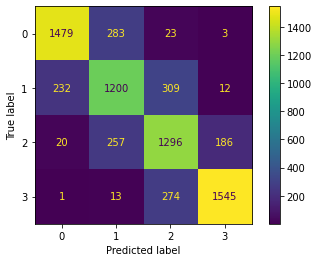

In [25]:
# confusion matrix accuracy precision recall f1 kappa
# XGBOOST
from xgboost import XGBClassifier


xgb_clf = XGBClassifier(max_depth=20, min_child_weight=5, gamma=0.5, use_label_encoder=False)
xgb_clf.fit(X_train, y_train)
y_predicted = xgb_clf.predict(X_test)

cm_nodelta = confusion_matrix(y_test, y_predicted)
disp_nodelta = ConfusionMatrixDisplay(confusion_matrix=cm_nodelta)
disp_nodelta.plot()
print("Accuracy: ",accuracy_score(y_test, y_predicted))
print("Recall: ",recall_score(y_test, y_predicted, average = 'macro'))
print("Precision: ",precision_score(y_test, y_predicted, average ='macro'))
print("F1 Score : ",f1_score(y_test, y_predicted, average='macro'))
print("Cohens Kappa : ",cohen_kappa_score(y_test, y_predicted))